<a href="https://colab.research.google.com/github/khushboo28sahu/Deep_Learning/blob/main/Lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import tensorflow as tf
from keras.datasets import imdb
from keras import models
from keras import layers
from tensorflow.keras import optimizers

In [1]:
# The IMDB dataset
# Loading the IMDB dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


17473536/17464789 [==============================] - 0s 0us/step


In [2]:
# checking
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
# checking
train_labels[0]

1

In [4]:
# checking
max([max(sequence) for sequence in train_data])


9999

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1654784/1641221 [==============================] - 0s 0us/step


In [6]:
# Preparing the data
# Encoding the integer sequences into a binary matrix
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
	results = np.zeros((len(sequences), dimension))
	for i, sequence in enumerate(sequences):
		results[i, sequence] = 1.
	return results 

  
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
# Checking
x_train[0]


array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
# vectorize your labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [10]:
# Building your network
# Model definition
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [11]:
# Compiling the model
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])


In [16]:
# Configuring the optimizer
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [17]:
# Using custom losses and metrics
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss=losses.binary_crossentropy,metrics=[metrics.binary_accuracy])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [18]:
# Validating your approach
# Setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [19]:
# Training your model
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 47ms/step - loss: 0.5129 - acc: 0.7885 - val_loss: 0.3886 - val_acc: 0.8644
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3071 - acc: 0.9014 - val_loss: 0.3029 - val_acc: 0.8897
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2266 - acc: 0.9247 - val_loss: 0.2779 - val_acc: 0.8920
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1743 - acc: 0.9455 - val_loss: 0.2751 - val_acc: 0.8903
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1441 - acc: 0.9539 - val_loss: 0.2844 - val_acc: 0.8855
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1199 - acc: 0.9639 - val_loss: 0.2996 - val_acc: 0.8815
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0979 - acc: 0.9735 - val_loss: 0.3082 - val_acc: 0.8841
Epoch 8/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0828 - a

In [20]:
# Checking
>>> history_dict = history.history
>>> history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

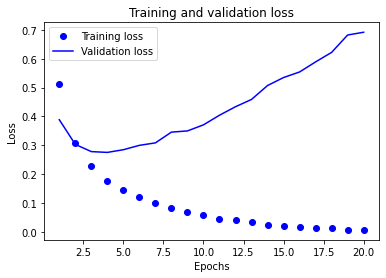

In [21]:
# Plotting the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

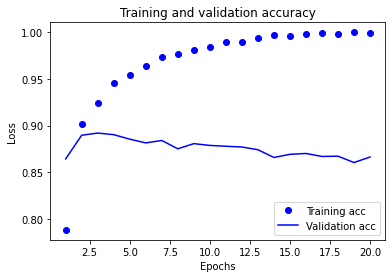

In [22]:
# Plotting the training and validation accuracy
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
# Retraining a model from scratch
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 25ms/step - loss: 0.4311 - accuracy: 0.8306
Epoch 2/4
49/49 [==============================] - 1s 25ms/step - loss: 0.2495 - accuracy: 0.9102
Epoch 3/4
49/49 [==============================] - 1s 25ms/step - loss: 0.1941 - accuracy: 0.9310
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2997 - accuracy: 0.8826


In [24]:
# Checking
results


[0.2997070848941803, 0.88264000415802]

In [25]:
# Using a trained network to generate predictions on new data
model.predict(x_test)

array([[0.15065166],
       [0.9992955 ],
       [0.8960453 ],
       ...,
       [0.07448021],
       [0.05621976],
       [0.62446237]], dtype=float32)